# EDA with Categorical Data

* <b>PassengerID</b>: random ID assigned to passengers
* <b>Pclass</b>: Ticket class of passenger (i.e, 1st class, 2nd class, and 3rd class)
* <b>Name</b>: Name of the passenger
* <b>Sex</b>: Male or Female
* <b>Age</b>: Age of passenger
* <b>SibSp</b>: Number of siblings accompanying passenger
* <b>Parch</b>: Number of parents and children accompanying passenger
* <b>Ticket</b>: Ticket number of passenger
* <b>Fare</b>: Fare paid for ticket
* <b>Cabin</b>: Cabin number of passenger
* <b>Embarked</b>: Port from which passenger embarked
* <b>Survived</b>: 0 and 1 for died and survived, respectively

In [10]:
# Import the libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow embedding plots in Jupyter (magic function)
%matplotlib inline

In [11]:
titanicDf = pd.read_csv('./titanic.csv')

In [12]:
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Removing numerical and irrelevant features
numericalAndIrrelevantFeats = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']

titanicDf.drop( numericalAndIrrelevantFeats, axis=1, inplace=True )

In [14]:
# Preview DataFrame after applying changes
titanicDf.head()

,Survived,Pclass,Sex,Cabin,Embarked
0,0,3,male,NaN,S
1,1,1,female,C85,C
2,1,3,female,NaN,S
3,1,1,female,C123,S
4,0,3,male,NaN,S


In [15]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(2), object(3)
memory usage: 34.9+ KB


In [16]:
condition = titanicDf['Cabin'].isnull()
titanicDf.groupby( condition ).mean()

,Survived,Pclass
Cabin,,
False,0.666667,1.196078
True,0.299854,2.639010


In [17]:
# Feature engineer cabin_ind
titanicDf['cabin_ind'] = np.where( titanicDf['Cabin'].isnull(), 0, 1 )

In [18]:
titanicDf.head(10)

,Survived,Pclass,Sex,Cabin,Embarked,cabin_ind
0,0,3,male,NaN,S,0
1,1,1,female,C85,C,1
2,1,3,female,NaN,S,0
3,1,1,female,C123,S,1
4,0,3,male,NaN,S,0
5,0,3,male,NaN,Q,0
6,0,1,male,E46,S,1
7,0,3,male,NaN,S,0
8,1,3,female,NaN,S,0
9,1,2,female,NaN,C,0


<Figure size 432x288 with 0 Axes>

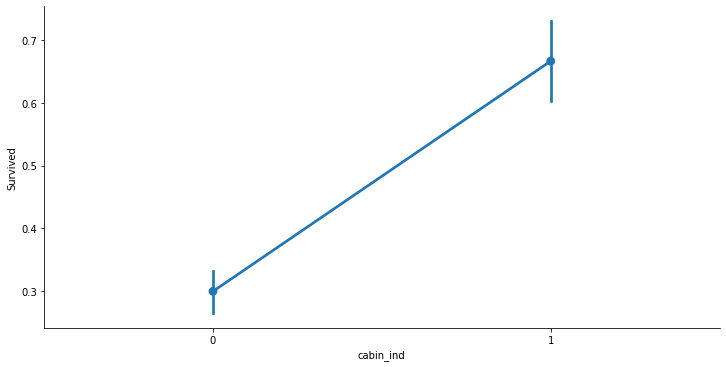

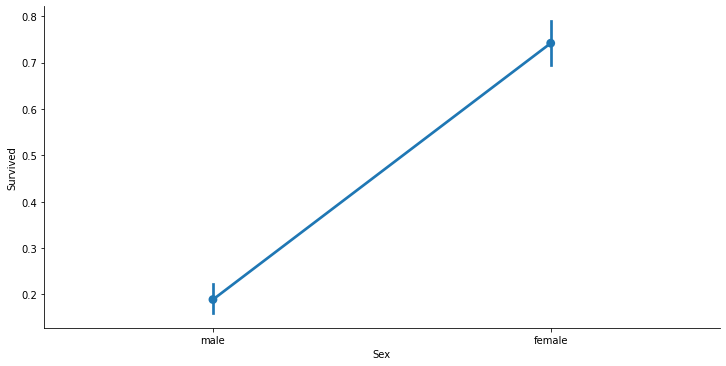

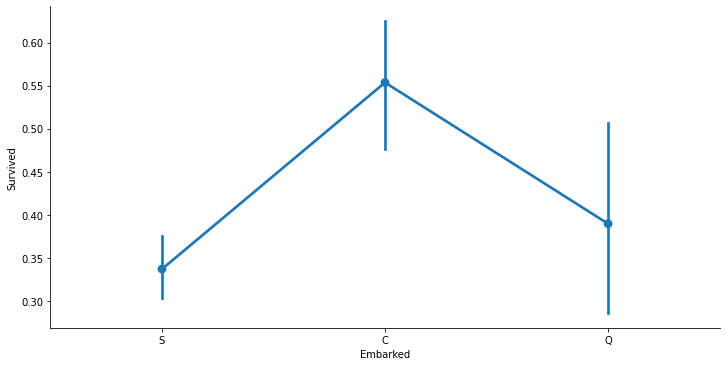

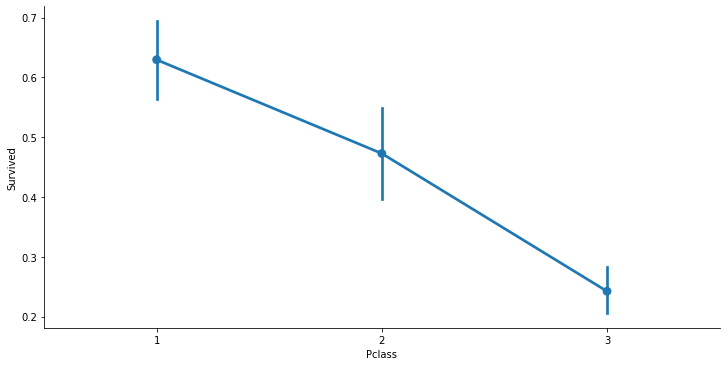

In [19]:
explanatoryFeats = ['cabin_ind', 'Sex', 'Embarked', 'Pclass']

for i, feat in enumerate( explanatoryFeats ):
    # Create the figures with matplotlib
    plt.figure(i)

    # Add plot in the figure
    sns.catplot( x=feat, y='Survived', data=titanicDf, kind='point', aspect=2 )

<Figure size 432x288 with 0 Axes>

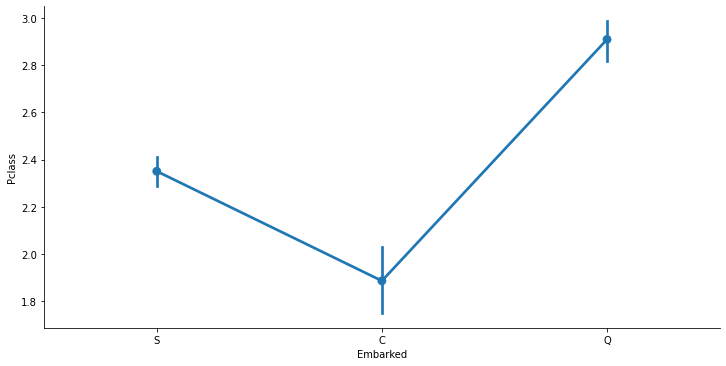

In [20]:
explanatoryFeats = ['Embarked']

for i, feat in enumerate( explanatoryFeats ):
    # Create the figures with matplotlib
    plt.figure(i)

    # Add plot in the figure
    sns.catplot( x=feat, y='Pclass', data=titanicDf, kind='point', aspect=2 )

In [38]:
# Proportions of male vs female

# ~%35 female, %65 male 
condition = titanicDf['Sex']
titanicDf.groupby( condition ).size()

femaleProp = len(titanicDf[ titanicDf['Sex'] == 'female' ]['Sex'])/len(titanicDf)
maleProp = len(titanicDf[ titanicDf['Sex'] == 'male' ]['Sex'])/len(titanicDf)

print('%{:.2f} of passengers were male'.format( maleProp*100) )
print('%{:.2f} of passengers were female'.format( femaleProp*100) )

%64.76 of passengers were male
%35.24 of passengers were female


In [64]:
titanicDf[ titanicDf['Survived'] == 0 ].groupby('Embarked').size()

Embarked
C     75
Q     47
S    427
dtype: int64

In [66]:
titanicDf[ titanicDf['Survived'] == 1 ].groupby('Embarked').size()

Embarked
C     93
Q     30
S    217
dtype: int64